In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


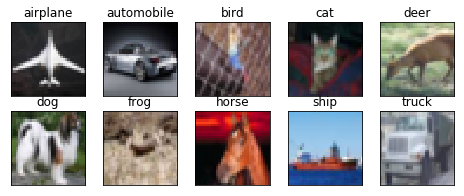

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## FLAWED MODEL

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

## Save the Flawed Model

In [0]:
from keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/gdrive')

# checkpoint
model_path="/content/gdrive/My Drive/Colab Notebooks/Assignment6"
model_file = model_path + '/flawed_model.hd5'
checkpoint = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 35s 90ms/step - loss: 2.2073 - acc: 0.3824 - val_loss: 2.0031 - val_acc: 0.4470

Epoch 00001: val_acc improved from -inf to 0.44700, saving model to /content/gdrive/My Drive/Colab Notebooks/Assignment6/flawed_model.hd5
Epoch 2/100
390/390 [==============================] - 30s 77ms/step - loss: 1.6231 - acc: 0.5641 - val_loss: 1.6010 - val_acc: 0.5706

Epoch 00002: val_acc improved from 0.44700 to 0.57060, saving model to /content/gdrive/My Drive/Colab Notebooks/Assignment6/flawed_model.hd5
Epoch 3/100
390/390 [==============================] - 29s 76ms/step - loss: 1.3327 - acc: 0.6540 - val_loss: 1.2172 - val_acc: 0.6869

Epoch 00003: val_acc improved from 0.57060 to 0.68690, saving model to /content/gdrive/My Drive/Colab Notebooks/Assignment6/flawed_model.hd5
Epoch 4/100
390/390 [==============================] - 30s 76ms/step - loss: 1.1449 - acc: 0.7043 - val_loss: 1.2558 - val_acc: 0.6640

Epoch 00004: val_acc did not improve

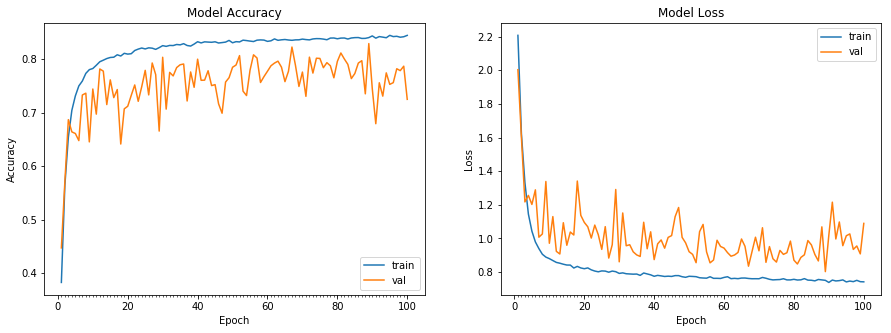

Accuracy on test data is: 72.49


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Flawed Model Val Accuracy : 72.49

## Assignment 6 B : Refactored Code with Functional Keras

* Used Functional Keras
* Normal Convolution
* Spatially Separable Convolution
* Depthwise Separable Convolution
* Grouped Convolution (use 3x3, 5x5 only)
* Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 


In [0]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.layers import Input, SeparableConv2D, concatenate
from keras.models import Model

inputs = Input(shape=(32, 32, 3))

conv1 = Convolution2D(64, 3, 3, activation='relu', border_mode='same') (inputs) # (32,32,3) RF=3
batch_norm1 = BatchNormalization()(conv1)
layer1 = Dropout(0.35)(batch_norm1)


### NORMAL CONVOLUTION BEGINS ####
conv2_a = Convolution2D(64, 3, 3, activation='relu', border_mode='same') (layer1) # (32,32,64) RF=5
conv2_b = Convolution2D(128, 3, 3, activation='relu', border_mode='same') (conv2_a) #(32,32,64) RF=7
batch_norm2 = BatchNormalization()(conv2_b)
layer2 = Dropout(0.35)(batch_norm2)
#### NORMAL CONVOLUTION ENDS #### 


#### TRANSITION BLOCK 1 BEGINS ###
max_pool1 = MaxPooling2D(pool_size=(2, 2)) (layer2) #input(32,32,128) RF=14
conv3_a = Convolution2D(64, 1, 1)(max_pool1)  #input(16,16,128) RF=14
batch_norm3 = BatchNormalization()(conv3_a)
layer3 = Dropout(0.35)(batch_norm3)
#### TRANSITION BLOCK 1 ENDS ####


###### Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1)) #######
conv_spatial1 = Convolution2D(64, 3, 1, activation='relu', border_mode='same')(layer3) #(16,16,64) RF=(16,14)
conv_spatial2 = Convolution2D(64, 1, 3, activation='relu', border_mode='same')(conv_spatial1) #(16,16,64) RF=(16,16)

conv_spatial3 = Convolution2D(128, 3, 1, activation='relu', border_mode='same')(conv_spatial2) #(16,16,64) RF=(18,16)
conv_spatial = Convolution2D(128, 1, 3, activation='relu', border_mode='same')(conv_spatial3) #(16,16,128) RF=(18,18)

batch_norm4 = BatchNormalization()(conv_spatial)
layer4 = Dropout(0.35)(batch_norm4)
#### END ###########



#### TRANSITION BLOCK 2 BEGINS ###
max_pool2 = MaxPooling2D(pool_size=(2, 2)) (layer4) #input(16,16, 128) RF=36
conv4_a = Convolution2D(64, 1, 1)(max_pool2)  #input(8,8,128) RF=36
batch_norm5 = BatchNormalization()(conv4_a)
layer5 = Dropout(0.35)(batch_norm5)
#### TRANSITION BLOCK 2 ENDS ####


#### DEPTH-WISE SEPARABLE CONVOLUTION ####
conv_depth_sep1 = SeparableConv2D(128, 3, 3, activation='relu', border_mode='same')(layer5) #input(8,8,64) RF=38
batch_norm6 = BatchNormalization()(conv_depth_sep1)
layer6 = Dropout(0.35)(batch_norm6)
#### END ######


#### TRANSITION BLOCK 3 BEGINS ###
max_pool3 = MaxPooling2D(pool_size=(2, 2)) (layer6) #input(8,8,128) RF=76
conv5_a = Convolution2D(64, 1, 1)(max_pool3)  #input(4,4,128) RF=76
batch_norm5 = BatchNormalization()(conv5_a)
layer7 = Dropout(0.35)(batch_norm5)
#### TRANSITION BLOCK 3 ENDS ####


### Grouped Convolution (use 3x3, 5x5 only) ###
conv3_3_1 = Convolution2D(64, 3, 3, border_mode='same', activation='relu') (layer7)   #input(4,4,128) RF=78
conv5_5_1 = Convolution2D(64, 5, 5, border_mode='same', activation='relu') (layer7)   #(4,4,128) RF=80
concat1_temp = concatenate([conv3_3_1, conv5_5_1]) #(4,4,128) RF=80
# concat1 = Convolution2D(64, 5, 5, activation='relu') (concat1_temp)  
### ENDS #####


#### Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 
conv3_3_2 = Convolution2D(64, 3, 3, border_mode='same', activation='relu', dilation_rate=(1, 1)) (concat1_temp) #(4,4,256) RF=82
conv5_5_2 = Convolution2D(64, 3, 3, border_mode='same', activation='relu', dilation_rate=(2, 2)) (concat1_temp) #(4,4,256) RF=84
concat2_temp = concatenate([conv3_3_2, conv5_5_2]) ##(4,4,512) RF=84
# concat2 = Convolution2D(64, 5, 5, activation='relu') (concat2_temp) #input(28,28,64)
### ENDS #### 

concat_final = Convolution2D(10,1,1, activation='relu')(concat2_temp)
concat_final = Convolution2D(10,4,4, activation='relu')(concat_final)


outputs = Flatten()(concat_final)

outputs= Activation('softmax')(outputs)


model = Model(inputs=[inputs], outputs=[outputs])

# prints a summary representation of our model
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update you

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 32, 32, 64)   256         conv2d_23[0][0]                  
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 32, 32, 64)   0           batch_normalization_8[0][0]      
__________________________________________________________________________________________________
conv2d_24 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), activation="relu")`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


195/195 [==============================] - 56s 288ms/step - loss: 1.7661 - acc: 0.3834 - val_loss: 1.9917 - val_acc: 0.3327
Epoch 2/50
195/195 [==============================] - 53s 274ms/step - loss: 1.2763 - acc: 0.5538 - val_loss: 1.4505 - val_acc: 0.5365
Epoch 3/50
195/195 [==============================] - 53s 274ms/step - loss: 0.9944 - acc: 0.6424 - val_loss: 1.7732 - val_acc: 0.4718
Epoch 4/50
195/195 [==============================] - 53s 274ms/step - loss: 0.8635 - acc: 0.6900 - val_loss: 1.3578 - val_acc: 0.5411
Epoch 5/50
195/195 [==============================] - 53s 274ms/step - loss: 0.7768 - acc: 0.7229 - val_loss: 0.9820 - val_acc: 0.6537
Epoch 6/50
195/195 [==============================] - 53s 274ms/step - loss: 0.7141 - acc: 0.7457 - val_loss: 1.0187 - val_acc: 0.6596
Epoch 7/50
195/195 [==============================] - 53s 274ms/step - loss: 0.6642 - acc: 0.7655 - val_loss: 1.4487 - val_acc: 0.5748
Epoch 8/50
195/195 [==============================] - 53s 274ms/st

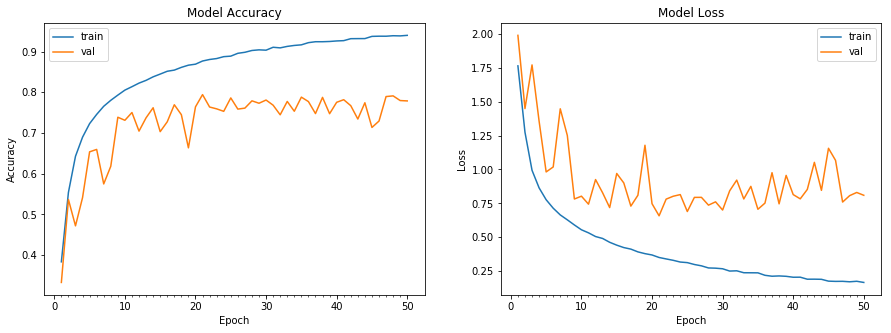

Accuracy on test data is: 77.88


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, featurewise_center=True, featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))